In [1]:
%pylab inline
import pandas as pd
import anndata

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [13]:
adata = anndata.read_loom('l6_r3_spinal_cord_neurons.loom', sparse=True)

In [7]:
import DCA.api as dca

Using TensorFlow backend.


In [14]:
adata.X = np.array(adata.X.todense())

In [15]:
res = dca.autoencode(adata, )

### Autoencoder: Successfully preprocessed 27998 genes and 1922 cells.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
count (InputLayer)              (None, 17183)        0                                            
__________________________________________________________________________________________________
enc0 (Dense)                    (None, 64)           1099776     count[0][0]                      
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 64)           192         enc0[0][0]                       
__________________________________________________________________________________________________
enc0_act (Activation)           (None, 64)           0           batch_normalization_4[0][0]      
______________________________________

In [16]:
res

AnnData object with n_obs × n_vars = 1922 × 17183 
    obs_keys = ['Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'CellID', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligo

In [17]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1)

In [19]:
YY = tsne.fit_transform(res.obsm['X_dca_hidden'])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1922 samples in 0.002s...
[t-SNE] Computed neighbors for 1922 samples in 0.236s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1922
[t-SNE] Computed conditional probabilities for sample 1922 / 1922
[t-SNE] Mean sigma: 2.091784
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.922348
[t-SNE] Error after 1000 iterations: 0.915671


In [20]:
res.obs['TSNE_1'] = YY[:, 0]
res.obs['TSNE_2'] = YY[:, 1]

In [21]:
import plotnine as p

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


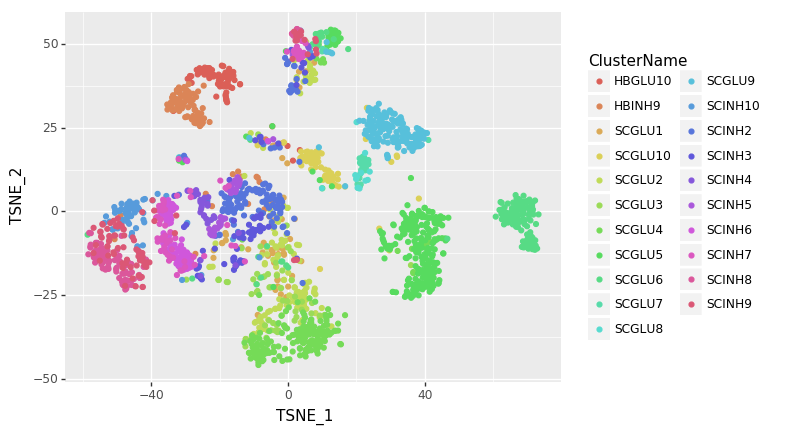

<ggplot: (-9223372036522988656)>

In [63]:
p.qplot('TSNE_1', 'TSNE_2', res.obs, color='ClusterName')

In [77]:
res.obs[['TSNE_1', 'TSNE_2', 'ClusterName']].to_csv('DCA_Zeisel_results.csv')